In [ ]:
# antes de empezar la lección tendremos que instalarunas librerías. Para ello tendreis que descomentar (una a una) la linea de abajo y ejecutar la celda
#!pip install scikit-learn
#!pip install seaborn
#!pip install matplotlib

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# cargamos el dataframe creado en la lección anterior
df = pd.read_csv("bank-additional.csv", index_col = 0)
df.head(1)

FileNotFoundError: [Errno 2] No such file or directory: 'bank-additional.csv'

## Tipos de nulos

- NaN (Not a Number): Puede aparecer en columnas numéricas y en algunas columnas de tipo objeto. Pandas utiliza la constante np.nan (importando numpy como np) para representar estos valores.

- None: Lo podremos encontrar en columnas de tipo objeto.

- Valores especiales de datos: En algunos conjuntos de datos, los valores nulos pueden tener representaciones específicas. Por ejemplo, en un conjunto de datos de encuestas, el valor "NA" o "N/A" podría utilizarse para denotar valores faltantes.

- Valores vacíos o en blanco: En columnas de texto, es posible que los valores nulos simplemente sean cadenas vacías o espacios en blanco.

- Valores especiales: En algunos casos, se pueden usar valores especiales que actúan como "marcadores" de nulos. Por ejemplo, usar un valor como -1 o 999 para indicar un valor faltante.

- NaT (Not a Timestamp): Se utilizan para denotar fechas y horas faltantes o desconocidas.



## Causas por las que existen nulos

- Errores en la recopilación de datos: Los valores faltantes pueden deberse a errores en la recopilación de datos, como errores de transcripción o problemas técnicos con los instrumentos de medición.

- Falta de respuesta: Los valores faltantes también pueden deberse a la falta de respuesta de los participantes en una encuesta o estudio. Esto puede deberse a la falta de disposición a responder ciertas preguntas o a la falta de tiempo o interés.

- Datos incompletos: Los valores faltantes también pueden deberse a datos incompletos, como cuando solo se recopilan datos para ciertas variables o cuando solo se recopilan datos para ciertos grupos o regiones.

- Fallos en la transmisión de datos: Los valores faltantes también pueden deberse a fallos en la transmisión de datos, como cuando se pierden datos durante la transferencia de datos de un sistema a otro.

## Por qué nos pueden molestar los nulos

- Error en el análisis
- Pierde la precisión e integridad de los datos
- Pérdida de información
- Ej: calcular media

## ¿Qué hacemos con esos nulos?

- Metodos de Pandas de limpieza y eliminaciñon: fillna(), dropna()
- Imputación de nulos con la librería scikit-learn


## Estrategias para la imputación de nulos

Podemos pensar que con la imputación nos estamos "inventando datos". Pero cuidado! Porque imputar valores es diferente de inventar datos: al inventar no usamos ningún criterio, y el valor asignado será totalmente arbitrario. Pero en la imputación lo que hacemos es mirar el comportamiento de los datos vecinos para poder estimar el valor del dato faltante.

No es lo mismo imputar variables categóricas que numéricas:


- **Para variables categóricas**

    - Imputación basada en la moda: Podemos reemplazar los valores nulos con la moda (valor más frecuente) de la variable. Esto se puede hacer utilizando el método `fillna()` de Pandas.

    - Imputación como una categoría especial: En algunos casos, podríamos querer mantener los valores nulos como una categoría especial. Es decir, sustituir por ejemplo por "Unknown" 
 

- **Para variables numéricas**

    - Imputación basada en estadísticos: Podemos utilizar la media, la mediana o la moda de la variable para reemplazar los valores nulos. Esto se puede hacer utilizando la clase `SimpleImputer` de Scikit-learn o el `fillna` de Pandas .

    - Imputación basada en modelos: Podemos utilizar modelos de aprendizaje automático para predecir los valores nulos basándote en las otras variables. Esto se puede hacer utilizando la clase `IterativeImputer` o el `KNNImputer`. Ya lo veremos después.

## Hoja de Ruta

1. Identificamos columnas del df con nulos.
2. Diferenciación entre variables categóricas y numéricas.
3. Aplicación de estrategias dependiendo de distintos factores:
   - Importancia de las variables dentro del análisis:
     - SI importante: se queda
     - NO importante: se elimina 
   - Tipo de variables:
     - Categóricas:
       - % ALTO nulos:
         - se imputan con la moda
         - se imputan con técnicas más avanzadas
       - % BAJO nulos:
         - distribución de categoría dominante -> imputación con la moda
         - distribución no dominante -> otra estrategia
     - Numéricas:
       - % ALTO nulos:
         - se imputan con técnicas más avanzadas
       - % BAJO nulos:
         - distribución simétrica: imputación con la media
         - distribución asimétrica: imputación con la mediana




### 1. Identificación de nulos

In [3]:
nulos = df.isnull().sum()
nulos

NameError: name 'df' is not defined

In [ ]:
df.shape[0]

In [ ]:
# % nulos
nulos = df.isnull().sum()/df.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

#### Aquí vamos a asumir que todas las variables son relevantes, pero en este punto es donde se podrían eleminar las que no son necesarias para nuestro análisis.

#### El siguiente paso es determinar las variables con un 'alto' % de nulos. Lo que se considera alto o no, depende del contexto

### Separación variables entre categóricas y numéricas. **Ojo, aquí los tipos tienen que estar bien.


In [ ]:
# Separamos las variables con nulos en variables categóricas y numéricas. Pero antes, deberemos haber comprobado que su tipo de dato es correcto.
df.dtypes

### Como no guardamos la limpieza en clases anteriores, hay variables que no tienen su tipo de dato de forma correcta y hay que cambiarlo:
   - cons.price.idx, cons.conf.idx, euribor3m -> pasar a numérico
   - podemos usar map para transformar los valores de loan


In [10]:
# Cambio a numérico variables 

def cambiar_comas(cadena):
    try:
    # Reemplazar las comas por puntos en la cadena
        return float(cadena.replace(",", "."))
    
    except:
        # Si ocurre algún error (por ejemplo, si el argumento no es una cadena),
        # devolver np.nan (valor Not a Number) para indicar un valor inválido o no disponible.
        return np.nan

df['cons.price.idx'] = df['cons.price.idx'].apply(cambiar_comas)
df['cons.conf.idx'] = df['cons.conf.idx'].apply(cambiar_comas)
df['euribor3m'] = df['euribor3m'].apply(cambiar_comas)

In [11]:
# Transformo variable loan

diccionario_mapa = {0: "No", 1: "Si"} 
df["loan"] = df["loan"].map(diccionario_mapa)
df["housing"] = df["housing"].map(diccionario_mapa)
df["default"] = df["default"].map(diccionario_mapa)

In [70]:
df['age'] = df['age'].astype(int)

In [ ]:
df.dtypes

In [ ]:
# GESTIÓN DE NULOS DE VARIABLES CATEGÓRICAS
# Queremos un dataframe con las variables objeto (categóricas) y que a su vez tengan nulos

In [ ]:
nulos

In [14]:
# Quiero ver las columnas de tipo object que tienen nulos
columnas_object_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns

In [ ]:
df.isnull().any()

In [ ]:
print(columnas_object_con_nulos)

In [ ]:
# Veamos, por columna, el porcentaje en el que aparece cada valor
for col in columnas_object_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

    #normalize sirve para que me de el porcentaje por columna, pero está en formato decimal, así que multiplicamos por 100

#### Recordamos nuestra hoja de ruta para variables categóricas

- % ALTO nulos:
    - se imputan con la moda (si distribución muy dominante)
    - se imputan con técnicas más avanzadas
- % BAJO nulos:
    - distribución de categoría dominante -> imputación con la moda
    - distribución no dominante -> nueva categoría

Decidamos ahora que hacer con cada una de las columnas: 

1. **job**: % BAJO nulos. Distribución no dominante, hay dos categorías que dominan, `admin` y `blue-collar` con un (25% y 22%) --> Nueva categoría, 'Unknown'

2. **marital** : % BAJO nulos. Distribución dominante: 60% 'married'. --> Reemplazar por moda

3. **education** y **housing**: % BAJO nulos. Distribución no dominante. --> Nueva categoría, 'Unknown'

4. **default**: % ALTo de nulos. Ctegoría dominante "No". NO importante para análisis --> ELIMINAR

5. **loan**:  % BAJO de nulos. Distribución dominante 'No'. --> Reemplazar por moda

6. **date**: En esta columna, tampoco observamos que haya una clase mayoritaría por lo que optaremos por reemplazar también por "Unknown". 

Resumiendo:
- Columnas que reemplazaremos por la moda:

    - marital

    - loan 

- Eliminar:
    - default 
    
- Columnas que reemplzaremos por ina categoría nueva ("Uknown"):

    - job

    - education

    - housing

    - contact_month
    
    - date



Recuerda que cada conjunto de datos es único, por lo que es importante tomar decisiones basadas en una comprensión profunda del dominio y del impacto potencial en tus análisis. Siempre es una buena idea evaluar el efecto de la imputación en la distribución y calidad de tus datos antes de continuar con el análisis.


In [23]:
# Eliminar columna
df.drop('default', axis = 1, inplace = True)

In [ ]:
columnas_moda = ["marital", "loan"]
columnas_desconocido = ["job", "education", "housing", "date"]

In [ ]:
#Vamos a imputar por la moda

In [26]:
df['marital'] = df['marital'].fillna(df['marital'].mode()[0]) #ponmos el [0] por si acaso hay más de una moda y nos quedamos con la primera

In [27]:
df['loan'] = df['loan'].fillna(df['loan'].mode()[0]) 

In [ ]:
df.isnull().sum()

In [29]:
#Ahora vamos a encargarnos de las columnas en las que hay que crear una nueva categoría a la que llamaremos 'Unknown'

In [ ]:
df['job'] = df['job'].fillna('Unknown')

In [32]:
#O lo hacemos en todas a la vez
columnas_desconocido = ["job", "education", "housing", "date"]

for col in columnas_desconocido:
    df[col] = df[col].fillna('Unknown')

In [ ]:
df.isnull().sum()

#### Ahora vamos a analizar las variables numéricas:

In [34]:
columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns

In [ ]:
print(columnas_number_con_nulos)

In [ ]:
for col in columnas_number_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

#### Aquí esta división por categorías no nos sirve mucho, lo que nos interesa es la distribución de los valores
#### Para entender la distribución de los valores, necesitamos hacer gráficos, cosa que aún no hemos aprendido a hacer, este código no es necesario que lo entendáis, solo los gráficos, lo veremos en la siguiente clase


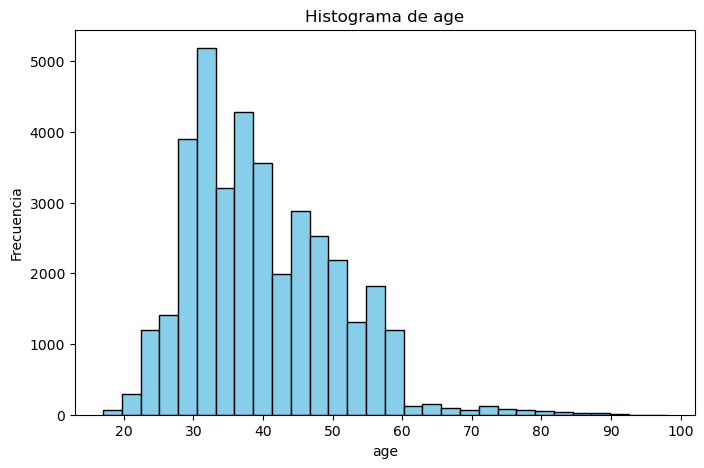

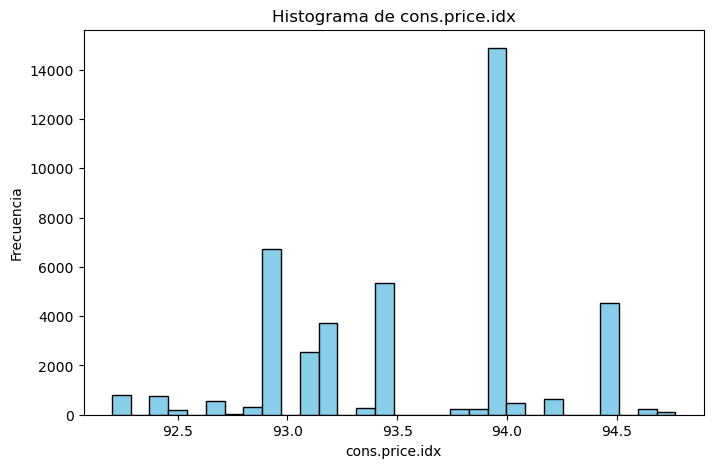

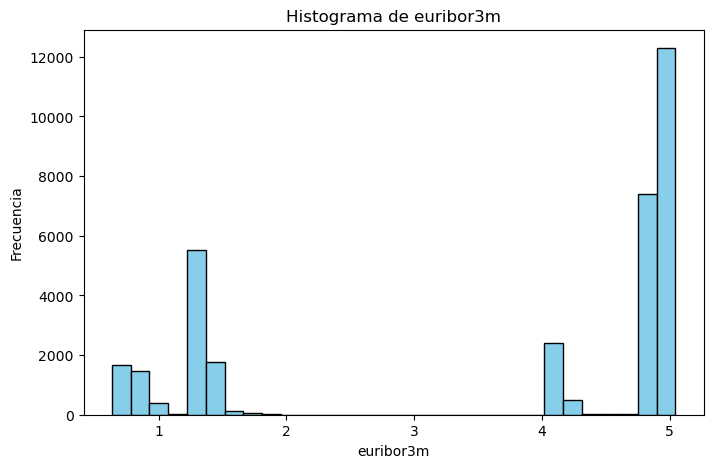

In [39]:
import matplotlib.pyplot as plt

# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


 #### Recordamos nuestra hoja de ruta para variables numéricas
 
  - % ALTO nulos:
    - se imputan con técnicas más avanzadas
  - % BAJO nulos:
    - distribución simétrica: imputación con la media
    - distribución asimétrica: imputación con la mediana

#### Vamos a determinar la estrategia de gestión de nulos para cada una de las variables numéricas con nulos:

- Age: Bajo % nulos + distribución no simétrica -> imputación con la mediana
- cons.price.idx: Bajo % nulos + distribución no simétrica -> imputación con la mediana
- euriborn3m: Medio-alto % nulos -> imputación con métodos avanzados
  

En resumen:
- Imputación con la mediana: age, cons.price.idx
- Imputación técnicas avanzadas: euriborn3m

In [53]:
#Primero imputamos por la mediana: age y cons.price.idx
median_conspriceidx = df["cons.price.idx"].median()
print(median_conspriceidx)

93.57


In [ ]:
df["cons.price.idx"] = df["cons.price.idx"].fillna(median_conspriceidx)


In [ ]:
df.isnull().sum()

In [73]:
median_age = df['age'].median()
print(median_age)

39.0


In [50]:
df['age'] = df['age'].fillna(median_age)

In [ ]:
df.isnull().sum()

In [ ]:
#Para valores bajos de nulos

#SimpleImputer

"""Imagina que tienes una tabla que tiene una columnacon muchos valores nulos. El SimpleImputer es una herramienta
automática que te ayuda a rellenar esos nulos con valores "inteligentes". Para ello, se fija en los valores que SÍ tenemos en la columna
y usa estrategías para elegir qué valor poner en los nulos. Algunas de sus estrategias son: la media, mediana, moda

"""

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Aquí puedes elegir 'mean', 'median', 'mode", etc.
df['edad'] = imputer.fit_transform(df[['edad']])

""" En realidad es lo mismo que como lo hemos hecho antes manualmente, pero podemos hacerlo de manera más automática, pasándole más columnas"
#IterativeImputer

"""""
columnas_a_imputar = ['edad', 'salario', 'altura']

df[columnas_a_imputar] = imputer.fit_transform(df[columnas_a_imputar])


#Para valores altos de nulos

#IterativeImputer
"""Es una heramienta para imputar valores nulos que, en vez de usar la media oo mediana, "predice" lo que puede ir en esos nulos
fijándose en el resto de valores que SÍ tenemos y en los valores que hay en otras columnas
y cómo esos valores pueden influir en el valor de la columna que intento imputar. Para ello, no hace solo una vez estas predicciones,
si no muchas, para acercarse lo máximo posible a la verdad.

Tiene dos parametros que se usan para controlar su comportamiento.
Max_iter: el número máximo de repeticiones para adivinar los nulos, cuanto más alto, mejor, aunque depende de la cantidad de datos.
(10-50 es bajo 500-1000 es bastante alto)
Random_state: controla la aleatoriedad, me asegura de que cuando lo ejecute varias veces, me de los mismos resultados.
El valor que le demos da igual, mientras lo usemos, se suele usar el 42 (guiño a Guía del autoestopista galáctico)"""

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df['euribor3m'] = imputer_iter.fit_transform(df[['euribor3m']])

# KNN

""" Es una herramienta de predicción que usa un algoritmo llamado "vecinos cercanos" en inglés. Para rellenar los datos faltantes,
se fija en los vecinos más cercanos, es decir, en las filas más similares que tengan datos completos.

Tiene el parámetro:
n_neighbors:  es el número de vecinos que tendrá en cuenta, es decir, filas con valores similares y sin nulos. 
Cuantos más vecinos tenganmos en cuenta, mejor, pero dependerá de la cantidad de nuestros datos.
Si tenemos una cantidad pequeña de datos con 3-5 vecinos estará bien.
Si tenemos una gran cantidad de datos, 10-20 estará mejor.

Diferencia con IterativeImputer:
- Iterative se centra en cómo influyen las columnas entre sí y KNN en el parecido
- KNN es más sencillo y no itera X veces
- KNN es más rápido, mejor para df pequeños
- KNN es más sensible a valores atípicos, no tiene en cuenta relaciones complejas
- Iterative es más preciso, es mejor para conjuntos grandes o complejos con muchas relaciones entre columnas

"""

imputer_knn = KNNImputer(n_neighbors=5)
df['euribor3m'] = imputer_iter.fit_transform(df[['euribor3m']])

In [60]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df['euribor3m'] = imputer_iter.fit_transform(df[['euribor3m']])

In [ ]:
df.isnull().sum()

In [163]:
df.to_csv('bank-additional-no-nulos.csv', index=False)

#### Resumen gestión de nulos:

  - eliminación de variables: drop(), dropna()
    - df= df.dropna(subset=[column]) me elimina solo las líneas que son nulas, pero pierdo también los valores de las otras columnas

  - imputación de variables:

    - fillna() -> df[col].fillna(value)
    - SimpleImputer 
    - Iterative Imputer
    - KNN Imputer
